In [8]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from obspy import UTCDateTime as UT
import numpy as np
import json
import sys
import os
from pyproj import Proj
import copy
from gamma.utils import estimate_eps

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)
from harpa.utils import *
from harpa.plt_utils import *
# from harpa import run_harpa
from harpa.load_data import load_ridgecrest,load_ridgecrest_full

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
picks,stations,config,proj=load_ridgecrest(time_start=None,time_end=None)
#picks, stations, config, proj,catalog=load_ridgecrest_full(time_start=None, time_end=None,drop_index=True)

In [10]:
stations

,id,longitude,latitude,elevation_m,x(km),y(km),z(km)
0,CI.CCC..BH,-117.365,35.525,670.0,36.280782,-35.098364,-0.6700
1,CI.CCC..HH,-117.365,35.525,670.0,36.280782,-35.098364,-0.6700
2,CI.CCC..HN,-117.365,35.525,670.0,36.280782,-35.098364,-0.6700
3,CI.CLC..BH,-117.598,35.816,775.0,15.092236,-2.871977,-0.7750
4,CI.CLC..HH,-117.598,35.816,775.0,15.092236,-2.871977,-0.7750
5,CI.CLC..HN,-117.598,35.816,775.0,15.092236,-2.871977,-0.7750
6,CI.DTP..BH,-117.846,35.267,908.0,-7.370427,-63.794195,-0.9080
7,CI.DTP..HH,-117.846,35.267,908.0,-7.370427,-63.794195,-0.9080
8,CI.DTP..HN,-117.846,35.267,908.0,-7.370427,-63.794195,-0.9080
9,CI.JRC2..BH,-117.809,35.982,1469.0,-3.968109,15.534933,-1.4690


In [3]:
picks

,id,timestamp,prob,amp,type
0,CI.CCC..BH,2019-07-04 22:00:06.084,0.939738,0.000017,P
1,CI.CCC..BH,2019-07-04 22:00:31.934,0.953992,0.000006,P
2,CI.CCC..BH,2019-07-04 22:00:38.834,0.837302,0.000006,P
3,CI.CCC..BH,2019-07-04 22:01:15.654,0.881130,0.000005,P
4,CI.CCC..BH,2019-07-04 22:01:32.054,0.869447,0.000004,P
...,...,...,...,...,...
78975,PB.B921..EH,2019-07-04 18:57:47.364,0.794157,0.000081,S
78976,PB.B921..EH,2019-07-04 18:58:13.704,0.722404,0.000094,S
78977,PB.B921..EH,2019-07-04 18:58:39.204,0.851178,0.000086,S
78978,PB.B921..EH,2019-07-04 18:59:03.404,0.796894,0.000021,S


In [16]:
config["ncpu"] = 30

config["x(km)"]=(-30, 60)
config["y(km)"]=(-70, 50)
config["z(km)"]=(-2, 22)
config['vel']['P']=config['vel']['p']
config['vel']['S']=config['vel']['s']
config['P_phase']=True
config['S_phase']=True
config['second_adjust']=False

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="This overload of addcmul_ is deprecated")


In [17]:
config

{'center': (-117.765, 35.842),
 'xlim_degree': (-118.14899999999999, -116.753),
 'ylim_degree': (34.69200000000001, 36.544),
 'vel': {'p': 6.0, 's': 3.4285714285714284, 'P': 6.0, 'S': 3.4285714285714284},
 'dims': ['x(km)', 'y(km)', 'z(km)'],
 'x(km)': (-30, 60),
 'y(km)': (-70, 50),
 'z(km)': (-2, 22),
 'ncpu': 30,
 'P_phase': True,
 'S_phase': True,
 'second_adjust': False}

In [18]:
picks

,id,timestamp,prob,amp,type
0,CI.CCC..BH,2019-07-04 22:00:06.084,0.939738,0.000017,P
1,CI.CCC..BH,2019-07-04 22:00:31.934,0.953992,0.000006,P
2,CI.CCC..BH,2019-07-04 22:00:38.834,0.837302,0.000006,P
3,CI.CCC..BH,2019-07-04 22:01:15.654,0.881130,0.000005,P
4,CI.CCC..BH,2019-07-04 22:01:32.054,0.869447,0.000004,P
...,...,...,...,...,...
78975,PB.B921..EH,2019-07-04 18:57:47.364,0.794157,0.000081,S
78976,PB.B921..EH,2019-07-04 18:58:13.704,0.722404,0.000094,S
78977,PB.B921..EH,2019-07-04 18:58:39.204,0.851178,0.000086,S
78978,PB.B921..EH,2019-07-04 18:59:03.404,0.796894,0.000021,S


In [20]:
stations

,id,longitude,latitude,elevation_m,x(km),y(km),z(km)
0,CI.CCC..BH,-117.365,35.525,670.0,36.280782,-35.098364,-0.6700
1,CI.CCC..HH,-117.365,35.525,670.0,36.280782,-35.098364,-0.6700
2,CI.CCC..HN,-117.365,35.525,670.0,36.280782,-35.098364,-0.6700
3,CI.CLC..BH,-117.598,35.816,775.0,15.092236,-2.871977,-0.7750
4,CI.CLC..HH,-117.598,35.816,775.0,15.092236,-2.871977,-0.7750
5,CI.CLC..HN,-117.598,35.816,775.0,15.092236,-2.871977,-0.7750
6,CI.DTP..BH,-117.846,35.267,908.0,-7.370427,-63.794195,-0.9080
7,CI.DTP..HH,-117.846,35.267,908.0,-7.370427,-63.794195,-0.9080
8,CI.DTP..HN,-117.846,35.267,908.0,-7.370427,-63.794195,-0.9080
9,CI.JRC2..BH,-117.809,35.982,1469.0,-3.968109,15.534933,-1.4690


In [ ]:


from harpa import association
pick_df, catalog_df=association(picks,stations,config,verbose=0)




In [1]:
import pickle

# Load pick_df
with open('pick_df.pkl', 'rb') as f:
    pick_df = pickle.load(f)

# Load station_df
with open('station_df.pkl', 'rb') as f:
    station_df = pickle.load(f)

# Load config
with open('config.pkl', 'rb') as f:
    config = pickle.load(f)

In [3]:
from harpa import association
pick_df_out, catalog_df=association(pick_df,station_df,config,verbose=10)

Associating 764 picks separated into 24 slides with 2 CPUs


  0%|          | 0/25 [00:00<?, ?it/s]

    station_id               timestamp type  time_ref
6    CX.MNMCX. 2014-05-01 00:12:47.630    S    708.26
14   CX.MNMCX. 2014-05-01 00:30:59.030    S   1799.66
17   CX.MNMCX. 2014-05-01 00:35:44.100    S   2084.73
26   CX.PATCX. 2014-05-01 00:01:06.470    S      7.10
38   CX.PATCX. 2014-05-01 00:51:00.680    S   3001.31
..         ...                     ...  ...       ...
723  CX.PSGCX. 2014-05-01 00:12:31.200    P    691.83
725  CX.PSGCX. 2014-05-01 00:14:04.650    P    785.28
729  CX.PSGCX. 2014-05-01 00:19:38.380    P   1119.01
747  CX.PSGCX. 2014-05-01 00:35:28.210    P   2068.84
749  CX.PSGCX. 2014-05-01 00:39:08.800    P   2289.43

[124 rows x 4 columns]
    station_id               timestamp type  time_ref
0    CX.MNMCX. 2014-05-01 00:00:13.850    P     11.14
1    CX.MNMCX. 2014-05-01 00:00:27.980    P     25.27
2    CX.MNMCX. 2014-05-01 00:00:39.360    S     36.65
24   CX.PATCX. 2014-05-01 00:00:07.080    S      4.37
25   CX.PATCX. 2014-05-01 00:00:35.250    S     32.54
40  

/scicore/home/dokman0000/shi0000/phase_association/harpa/sgld.py:52: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1485.)
  square_avg.mul_(alpha).addcmul_(1-alpha, d_p, d_p)
/scicore/home/dokman0000/shi0000/phase_association/harpa/sgld.py:52: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1485.)
  square_avg.mul_(alpha).addcmul_(1-alpha, d_p, d_p)


Step: 99, Loss: 25.37
Step: 99, Loss: 23.74
Step: 199, Loss: 26.74
Step: 199, Loss: 10.50
Step: 299, Loss: 20.75
Step: 399, Loss: 9.03
Step: 299, Loss: 6.19
Step: 499, Loss: 16.35
Step: 399, Loss: 4.22
Step: 599, Loss: 3.13
Step: 699, Loss: 21.57
Step: 499, Loss: 3.19
Step: 799, Loss: 13.33
Step: 899, Loss: 11.95
Step: 599, Loss: 2.69
Step: 999, Loss: 14.57
Final SGLD loss: 1000.00
Step: 699, Loss: 2.82
    station_id               timestamp type  time_ref
4    CX.MNMCX. 2014-05-01 00:08:11.290    S     54.26
27   CX.PATCX. 2014-05-01 00:08:03.900    S     46.87
42    CX.PB01. 2014-05-01 00:08:17.830    S     60.80
70    CX.PB02. 2014-05-01 00:08:19.150    S     62.12
127   CX.PB06. 2014-05-01 00:07:51.000    S     33.97
152   CX.PB08. 2014-05-01 00:08:13.750    S     56.72
186   CX.PB11. 2014-05-01 00:07:59.600    S     42.57
217   CX.PB12. 2014-05-01 00:07:38.420    S     21.39
218   CX.PB12. 2014-05-01 00:08:15.500    S     58.47
234   CX.PB16. 2014-05-01 00:08:30.220    S     73.19

100%|██████████| 25/25 [00:00<00:00, 201.11it/s]

removed 0 repeated events, left 1 unique events
 Associated 1 unique events


In [5]:

config["dbscan_eps"] = estimate_eps(stations, config["vel"]["p"]) 
config["dbscan_min_samples"] = 3

max_time_residue=2
min_peak_pre_event=16
min_peak_pre_event_s=0
min_peak_pre_event_p=0

#n_event_max=20
n_event_max=None
n_event_max_rate=1

#window_lenth=10*60 # in second
# window_lenth=60*10
# #window_lenth_shift=window_lenth/2
# window_lenth_shift=window_lenth/3
# #picks=picks[picks['type']=='P']
# start_time_total=picks['timestamp'].min()- pd.Timedelta(seconds=1)
# end_time_total=picks['timestamp'].max()+ pd.Timedelta(seconds=1)


harpa_config={
              'max_time_residue':  max_time_residue,
              'min_peak_pre_event': min_peak_pre_event,
              'min_peak_pre_event_s': min_peak_pre_event_s,
              'min_peak_pre_event_p': min_peak_pre_event_p,
              'n_event_max': n_event_max,
              'n_event_max_rate': n_event_max_rate,
              'second_adjust': True,
              'denoise_rate': 0,
              #'window_lenth': window_lenth,
              #'window_lenth_shift': window_lenth_shift,
              #'start_time_total': start_time_total,
              #'end_time_total': end_time_total,
              'max_p_travel_time': 5,
              'P_phase': True,
              'S_phase': True,
              'threshold_time': 3,
              'threshold_xyz': 3,
              'remove_overlap_events': False              
              }

harpa_config['init'] = 'data'
harpa_config.update(config)



harpa_config['init'] = 'data'
harpa_config.update(config)



    


harpa_config['lr'] = 0.05


harpa_config['noise'] = 1e-3

In [6]:
config["ncpu"] = 150
len(unique_labels)

NameError: name 'unique_labels' is not defined

In [ ]:
datetime

In [ ]:
from datetime import datetime, timedelta
from tqdm.contrib.concurrent import process_map
from harpa.harpa import run_harpa_dbscan
def run_harpa_wrapper(args):
    return run_harpa_dbscan(*args)
import platform
import multiprocessing as mp
station_df=stations.copy()
verbose=0

print(f"Associating {len(picks)} picks separated into {len(unique_labels)} slides with {config['ncpu']} CPUs")

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


if "ncpu" not in config:
    config["ncpu"] = max(1, min(32, mp.cpu_count() - 1))
else:
    config["ncpu"] = min(mp.cpu_count(), config["ncpu"])



if config["ncpu"] == 1:
    pick_df_list=[]
    catalog_df_list=[]
    for slice_index in range(len(unique_labels)):    
        pick_df,catalog_df=run_harpa_dbscan(load_file=False,picks=picks[picks['labels']==slice_index],station_df=station_df,key='',harpa_config=harpa_config,verbose=verbose)
        pick_df_list.append(pick_df)
        catalog_df_list.append(catalog_df)
else:
    
    args = [
    [
        False,                   # load_file
        picks[picks['labels']==slice_index],                   # picks
        station_df,              # station_df
        '',                      # key
        harpa_config,            # harpa_config
        slice_index + 1024,      # random seed
        'cpu',                   # device
        verbose,                 # verbose
        slice_index<0            # skip the association
    ]
    for slice_index in range(-1,len(unique_labels))
    ]

    results = process_map(run_harpa_wrapper, args, max_workers=config["ncpu"], chunksize=1)
    pick_df_list, catalog_df_list = zip(*results)
    pick_df_list = list(pick_df_list)
    catalog_df_list = list(catalog_df_list)

Associating 78980 picks separated into 553 slides with 40 CPUs


  0%|          | 0/554 [00:00<?, ?it/s]

In [ ]:
catalog_df['time'][0][0]

TypeError: 'UTCDateTime' object is not subscriptable

In [ ]:
harpa_config['remove_overlap_events']=False
pick_df, catalog_df=reindex_picks_and_events(pick_df_list,catalog_df_list,harpa_config=harpa_config,overlap=0)
len(pick_df),len(catalog_df),pick_df[pick_df.event_index>-1].diff_time.std()

Reindexing picks and events...


100%|██████████| 554/554 [00:03<00:00, 184.35it/s]

removed 0 repeated events, left 1248 unique events


(78980, 1248, 0.49259544417642137)

In [7]:
pick_df_, catalog_df_=denoise_events(pick_df,catalog_df,stations,km=True,MIN_NEAREST_STATION_RATIO=0.3,verbose=0)
len(catalog_df_)

1069

In [ ]:
#pick_df_, catalog_df_=denoise_events(pick_df,catalog_df,station_df,km=True,MIN_NEAREST_STATION_RATIO=0.3,verbose=0)

In [ ]:
#len(catalog_df_)

<Figure size 700x700 with 0 Axes>

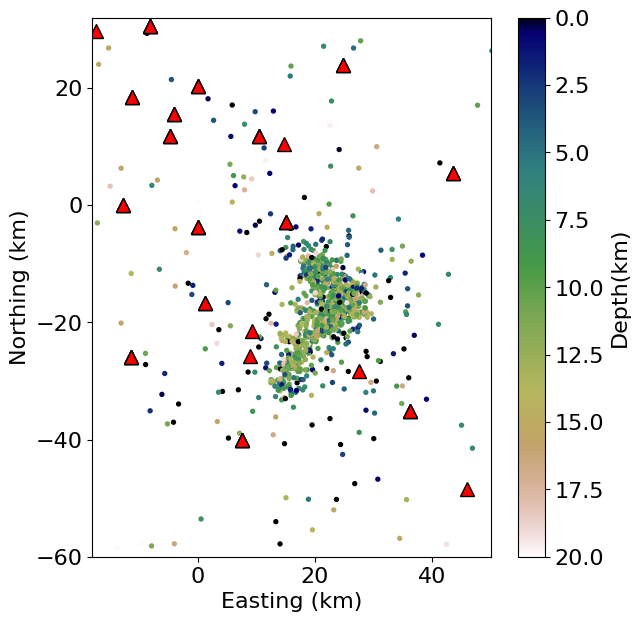

In [ ]:
#catalog_df_=catalog_df[(catalog_df['time']>UT('2019-07-08')) & (catalog_df['time']<UT('2019-07-09'))]
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(7, 7))
catalog_df_=catalog_df
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
cb = ax.scatter(catalog_df_["x(km)"], catalog_df_["y(km)"], c=catalog_df_["z(km)"], s=8, cmap="gist_earth",vmin=0,vmax=20)
cbar = fig.colorbar(cb)
cbar.ax.set_ylim(cbar.ax.get_ylim()[::-1])
cbar.set_label("Depth(km)")

ax.plot(stations["x(km)"], stations["y(km)"], "r^", ms=10, mew=1, mec="k")
ax.set_xlabel("Easting (km)")
ax.set_ylabel("Northing (km)")
ax.set_xlim([-18,50])
ax.set_ylim([-60,32])
plt.savefig('../save/ridgecrest/harpa.pdf', format='pdf',bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
pick_df_, catalog_df_=denoise_events(pick_df,catalog_df,station_df,km=True,MIN_NEAREST_STATION_RATIO=0.3,verbose=0)


In [ ]:
len(catalog_df_)

1078

<Figure size 700x700 with 0 Axes>

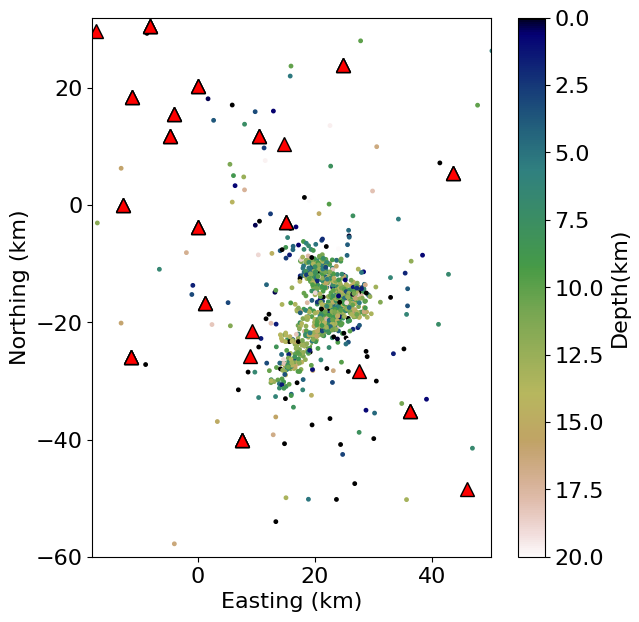

In [ ]:
#catalog_df_=catalog_df[(catalog_df['time']>UT('2019-07-08')) & (catalog_df['time']<UT('2019-07-09'))]
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(7, 7))
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
cb = ax.scatter(catalog_df_["x(km)"], catalog_df_["y(km)"], c=catalog_df_["z(km)"], s=6, cmap="gist_earth",vmin=0,vmax=20)
cbar = fig.colorbar(cb)
cbar.ax.set_ylim(cbar.ax.get_ylim()[::-1])
cbar.set_label("Depth(km)")

ax.plot(stations["x(km)"], stations["y(km)"], "r^", ms=10, mew=1, mec="k")
ax.set_xlabel("Easting (km)")
ax.set_ylabel("Northing (km)")
ax.set_xlim([-18,50])
ax.set_ylim([-60,32])
plt.savefig('../save/ridgecrest/harpa.pdf', format='pdf',bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
pick_df.to_pickle('../save/ridgecrest/harpa_picks.pkl')
catalog_df.to_pickle('../save/ridgecrest/harpa_catalog.pkl')

In [ ]:
pick_df.to_pickle('../save/ridgecrest/harpa_picks.pkl')
catalog_df.to_pickle('../save/ridgecrest/catalog_df.pkl')

In [ ]:
ppdf=pick_df_list[index]
ccdf=catalog_df_list[index]

NameError: name 'index' is not defined

In [ ]:
ppdf[(ppdf['event_index']==2) & (ppdf['type']=='P')]

In [ ]:
ppdf[(ppdf['event_index']==2) & (ppdf['type']=='S')]

In [ ]:
stations

In [ ]:
plot_assosication_time_window(ppdf[ppdf['event_index']==2],'event_index',station_df,ccdf[ccdf['event_index']==2])
plot_assosication_line_window(ppdf[ppdf['event_index']==2],'event_index',station_df,ccdf[ccdf['event_index']==2],plot_y_as='x')

In [ ]:
index=139
plot_assosication_time_window(pick_df_list[index],'event_index',station_df,catalog_df_list[index])
plot_assosication_line_window(pick_df_list[index],'event_index',station_df,catalog_df_list[index],plot_y_as='x')
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
cb = ax.scatter(catalog_df_list[index]["x(km)"], catalog_df_list[index]["y(km)"], c=catalog_df_list[index]["z(km)"], s=8, cmap="viridis")

for i in range(len(catalog_df_list[index])):
    ax.text(catalog_df_list[index]["x(km)"].values[i],catalog_df_list[index]["y(km)"].values[i],catalog_df_list[index]["event_index"].values[i])

cbar = fig.colorbar(cb)
cbar.ax.set_ylim(cbar.ax.get_ylim()[::-1])
cbar.set_label("Depth[km]")

ax.plot(stations["x(km)"], stations["y(km)"], "r^", ms=10, mew=1, mec="k")
ax.set_xlabel("Easting [km]")
ax.set_ylabel("Northing [km]")
ax.set_xlim([-18,50])
ax.set_ylim([-60,32])
plt.show()

In [ ]:
plot_assosication_time_window(pick_df,'event_index',station_df,catalog_df,plot_y_as='x',time_start='2019-07-04 19:45:00.000000',time_end='2019-07-04 19:47:00.000000')

In [ ]:
plot_assosication_line_window(pick_df,'event_index',station_df,catalog_df,plot_y_as='x',time_start='2019-07-04 19:45:00.000000',time_end='2019-07-04 19:47:00.000000')

In [ ]:
len(catalog_df)

In [ ]:

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
cb = ax.scatter(catalog_df["x(km)"], catalog_df["y(km)"], c=catalog_df["z(km)"], s=8, cmap="viridis")
cbar = fig.colorbar(cb)
cbar.ax.set_ylim(cbar.ax.get_ylim()[::-1])
cbar.set_label("Depth[km]")

ax.plot(stations["x(km)"], stations["y(km)"], "r^", ms=10, mew=1, mec="k")
ax.set_xlabel("Easting [km]")
ax.set_ylabel("Northing [km]")
ax.set_xlim([-18,50])
ax.set_ylim([-60,32])
plt.show()

In [ ]:
pick_df, catalog_df=denoise_events(pick_df,catalog_df,station_df,km=True,MIN_NEAREST_STATION_RATIO=0.3,verbose=0)

In [ ]:
len(catalog_df)

In [ ]:

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
cb = ax.scatter(catalog_df["x(km)"], catalog_df["y(km)"], c=catalog_df["z(km)"], s=2, cmap="viridis")
cbar = fig.colorbar(cb)
cbar.ax.set_ylim(cbar.ax.get_ylim()[::-1])
cbar.set_label("Depth[km]")

ax.plot(stations["x(km)"], stations["y(km)"], "r^", ms=10, mew=1, mec="k")
ax.set_xlabel("Easting [km]")
ax.set_ylabel("Northing [km]")
ax.set_xlim([-18,50])
ax.set_ylim([-60,32])
plt.show()

In [ ]:
sum(pick_df['event_index']>-1)/len(pick_df['event_index'])

In [ ]:


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect("equal")

for index in range(100,200):
    cb = ax.scatter(catalog_df_list[index]["x(km)"], catalog_df_list[index]["y(km)"], c=catalog_df_list[index]["z(km)"], s=8, cmap="viridis")

    for i in range(len(catalog_df_list[index])):
        ax.text(catalog_df_list[index]["x(km)"].values[i],catalog_df_list[index]["y(km)"].values[i],index)

cbar = fig.colorbar(cb)
cbar.ax.set_ylim(cbar.ax.get_ylim()[::-1])
cbar.set_label("Depth[km]")

ax.plot(stations["x(km)"], stations["y(km)"], "r^", ms=10, mew=1, mec="k")
ax.set_xlabel("Easting [km]")
ax.set_ylabel("Northing [km]")
ax.set_xlim([-18,50])
ax.set_ylim([-60,32])
plt.show()

In [ ]:


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect("equal")

for index in range(100):
    cb = ax.scatter(catalog_df_list[index]["x(km)"], catalog_df_list[index]["y(km)"], c=catalog_df_list[index]["z(km)"], s=8, cmap="viridis")

    for i in range(len(catalog_df_list[index])):
        ax.text(catalog_df_list[index]["x(km)"].values[i],catalog_df_list[index]["y(km)"].values[i],index)

cbar = fig.colorbar(cb)
cbar.ax.set_ylim(cbar.ax.get_ylim()[::-1])
cbar.set_label("Depth[km]")

ax.plot(stations["x(km)"], stations["y(km)"], "r^", ms=10, mew=1, mec="k")
ax.set_xlabel("Easting [km]")
ax.set_ylabel("Northing [km]")
ax.set_xlim([-18,50])
ax.set_ylim([-60,32])
plt.show()